# 의미 연결망 분석

* 명사를 추출해 ..

In [1]:
import pandas as pd
import re

from pandas import read_excel

from msba import posts as p
from msba import stopwords as stopswords

## 키워드/관심어 불러오기

In [2]:
def interested_words():
    # 핵심단어 읽어 오기
    my_sheet = '소비키워드'
    keywords_filename = 'deskresearch_.xlsx'
    df = read_excel(keywords_filename, sheet_name = my_sheet, header=1) # index_col='번호'
    keywords = df['핵심단어']
    subkeywords = df['대체어']
    interested_words = df['키워드']
    return keywords, subkeywords, interested_words

keywords, subkeywords, interested_words = interested_words()

for keyword, subkeyword, interested_word in zip(keywords, subkeywords, interested_words):
    subkeyword = subkeyword.replace(" ", "").replace(",","|")
    interested_word = subkeyword + "|" + interested_word.replace(" ", "").replace(",","|")
#     print(keyword, " : " , subkeyword, interested_word)

# 자신의 관심사에 맞는 단어로 데이터 가져오기

In [3]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    res = ''.join([i for i in text if not i.isdigit()]) 
    return text

In [4]:
for keyword, subkeyword, interested_word in zip(keywords, subkeywords, interested_words):
    
    df = p.readall(keyword.replace(" ",""))
    df = df[ (df['date'] >= '2019-07-01') & (df['date'] < '2020-07-01')]
    df = df.drop_duplicates()
    
    rows = df['title'].apply(preprocessing) + df['content'].apply(preprocessing)
    
#     print(df.shape)

In [5]:
print(len(rows), type(rows))

1558 <class 'pandas.core.series.Series'>


In [6]:
import re

pattern = re.compile(r"[.,?!★~]")

sentences = []
for row in rows:
    sentences = sentences + pattern.split(row.replace("\xa0", "").replace("\t","").strip())
    sentences = list(set(sentences))

In [8]:
print(len(sentences), type(sentences))

22038 <class 'list'>


# 실전 : 말뭉치 생성 및 전처리

In [9]:
def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(org_list)
# Convert list of strings to string
full_str = convert_list_to_string(sentences[1])
print(full_str)

송 도 인 근 에 서   돌 잔 치   장 소 로   추 천 합 니 다


In [10]:
pattern = re.compile(r".*(광고정보).*")

corpus = []
for sentence in sentences:
    if len(sentence):
        sentence = sentence.strip().split(" ")
        sentence = convert_list_to_string(sentence).replace("  ", " ").strip()
        if pattern.match(sentence):
            continue
        else:
            corpus.append(sentence)

#             corpus = corpus + pattern.split(corpus)

In [11]:
print(len(corpus), type(corpus))

22027 <class 'list'>


# 특정한 단어 사용 빈도수

다음은 Scikit-Learn의 문자열 분석기를 사용하여 웹사이트에 특정한 단어가 어느 정도 사용되었는지 빈도수를 알아보는 코드이다.

In [14]:
import warnings
warnings.simplefilter("ignore")

import json
import string
from konlpy.utils import pprint
from konlpy.tag import Hannanum

hannanum = Hannanum()

docs = corpus
# docs = [
#         w for w in hannanum.nouns(" ".join(cell)) for cell in cells
#         if ((not w[0].isnumeric()) and (w[0] not in string.punctuation))
# ]

In [39]:
from msba import stopwords

# word = [ '1인미디어' ]
stopwords = stopswords.stopwords
stopwords_kr = stopwords + ['하지만', '그리고', '그런데', '저는','제가','있습니다', '않습니다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', 'ㅎㅎㅎ',
                '그럼', '이런', '저런', '합니다', '있어요', '참고로', '그러고', '아시죠', '하는',
                '있어서', '그냥', '같아요', '입니다', 'com', '아주', '않습니다',
                '같은', '해서', '있고', '않고', '없는', '있는데',
                'www', '먼저', '다시', '있도록', '등을','대한','있으니','미리','것이','모든', '00','없이',
                '정도','오늘', '근데', '같습니다','통해', '내가','나는', '나오는', 'http', '바랍니다',
                '있어', '위한','요즘','한번','밝혔다','계속', '됩니다','사실', '더욱', '하기',
                '경우', '000원','이미','가서','지금','by','그런', '보니','on', '했는데', '전에','좋을',
                '가는', '것도', '것을','있다고', '기자', '따른','보면','알고','있을','11','10','19',
                'image', '이제', '라고','있었어요','해도','좋습니다', '없고','위에','나온', '않는', '가지고','않은','그렇게','하는데',
                '그런지','많아서','것입니다','이건','또는', '있었습니다', '되어', '없습니다', '싶은',
                '하면', 'photo','아니라','역시','저희는', '저도','특히','30', '따로', '안녕하세요','항상','현재',
                '많은', '많이', '정말', '너무', 'https', 'Coupang', 'Coupa', 'ng'] 

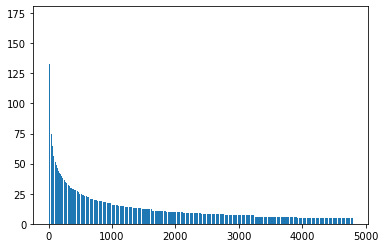

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=stopwords_kr, min_df=5, max_df=200).fit(docs)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.show()

In [54]:
tf_list = list(zip(feature_name, count))[:100]
               
tf_df = pd.DataFrame(tf_list,columns=['단어', '빈도'])

#mkdir output

# save to csv
filename = "./output/" + keyword.replace(" ","") + "_빈도" + ".csv"   
# filename_list.append(filename)
tf_df.to_csv(filename, date_format='%Y%m%d', encoding='utf-8-sig')

# N 그램

N그램은 단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(monogram)은 토큰 하나만 단어로 사용하며 바이그램(bigram)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
# corpus = [
#     'This is the first document.',
#     'This is the second second document.',
#     'And the third one.',
#     'Is this the first document?',
#     'The last document?',
# ]
vect = CountVectorizer(stop_words=stopwords_kr, min_df=5, max_df=200)
vect.fit(corpus)
# vect.vocabulary_

CountVectorizer(max_df=200, min_df=5,
                stop_words=['하지만', '그리고', '그런데', '저는', '제가', '있습니다', '않습니다그럼',
                            '이런', '저런', '합니다', '있어요', '참고로', '그러고', '아시죠', '하는',
                            '많은', '많이', '정말', '너무', 'https', 'Coupang', 'Coupa',
                            'ng', '1인', '미디어', '아휴', '아이구', '아이쿠', '아이고', '어', ...])

In [153]:
vect.transform(['이집의 대표작 Tete de Cru(떼뜨 드 크뤼)는 샤또 퓌세가 소유한 뿌이이퓌세의 35개 크뤼에서 각각의 와인을 만든후 나중에 블랜딩해서 만든 와인인데 이것은 그것보다 상위의 모노폴에서 만든 와인입니다']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [154]:
vect.transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [155]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'왼쪽부터 치마살': 83540,
 '치마살 갈비살': 111861,
 '갈비살 그리고': 9788,
 '그리고 아랫쪽은': 20238,
 '아랫쪽은 살치살이에요': 70857,
 '김일도 아시죠': 22209,
 '한국인들이 쉽게': 120379,
 '쉽게 하는': 65472,
 '하는 작은': 118926,
 '작은 오해': 95632,
 '칵테일이 있을': 112906,
 '있을 알았는데': 94581,
 '알았는데 칵테일은': 75086,
 '칵테일은 없더라구요': 112905,
 '샤워하고 마사지받을수있어서': 60964,
 '마사지받을수있어서 좋았어요': 38684,
 '그러고 보니': 19507,
 '보니 포스터': 52898,
 '포스터 느낌이': 117075,
 '느낌이 아내의': 27810,
 '아내의 우산과': 70299,
 '우산과 비슷한': 84285,
 '비슷한 느낌': 56226,
 '오늘은 홍천에': 81570,
 '홍천에 위치한': 124454,
 '위치한 한우': 85826,
 '한우 정육식당': 121053,
 '정육식당 뚜레': 100360,
 '뚜레 리뷰를': 37492,
 '리뷰를 하겠습니다': 38253,
 '정신적인 피해가': 100327,
 '피해가 물질적인': 117937,
 '물질적인 피해보다': 48099,
 '피해보다 경우도': 117949,
 '경우도 많은데': 13676,
 '많은데 현재로선': 40293,
 '현재로선 정신적': 123794,
 '정신적 피해보상을': 100323,
 '피해보상을 받으려면': 117951,
 '받으려면 음식점': 50098,
 '음식점 사장과': 87394,
 '사장과 합의를': 58141,
 '합의를 보던지': 122071,
 '진짜 삼합을': 107223,
 '삼합을 제대로': 59282,
 '제대로 즐겨보아요진대감은': 101074,
 '즐겨보아요진대감은 관자와': 105223,
 '관자와 차돌박이라면': 17065,
 '맛이 다른데': 41468,
 '다른데 저마

In [157]:
vect = CountVectorizer(ngram_range=(1, 2)).fit(corpus)
vect.vocabulary_

{'참고로': 165879,
 '담양군': 46613,
 '왼쪽부터': 128595,
 '치마살': 170743,
 '갈비살': 15682,
 '그리고': 31331,
 '아랫쪽은': 109648,
 '살치살이에요': 91186,
 '왼쪽부터 치마살': 128598,
 '치마살 갈비살': 170744,
 '갈비살 그리고': 15685,
 '그리고 아랫쪽은': 31499,
 '아랫쪽은 살치살이에요': 109649,
 '김일도': 34560,
 '아시죠': 110256,
 '김일도 아시죠': 34562,
 'go': 8893,
 '한국인들이': 184046,
 '쉽게': 101337,
 '하는': 181782,
 '작은': 145954,
 '오해': 126397,
 '한국인들이 쉽게': 184047,
 '쉽게 하는': 101380,
 '하는 작은': 181894,
 '작은 오해': 145991,
 '갈릭치킨밥': 15628,
 '칵테일이': 172315,
 '있을': 144384,
 '알았는데': 115693,
 '칵테일은': 172313,
 '없더라구요': 120364,
 '칵테일이 있을': 172316,
 '있을 알았는데': 144413,
 '알았는데 칵테일은': 115706,
 '칵테일은 없더라구요': 172314,
 '샤워하고': 94185,
 '마사지받을수있어서': 60167,
 '좋았어요': 156619,
 '샤워하고 마사지받을수있어서': 94186,
 '마사지받을수있어서 좋았어요': 60168,
 'ㅎㅎ아': 11532,
 '이채유': 138146,
 '평일': 178828,
 '그러고': 30601,
 '보니': 81368,
 '포스터': 179080,
 '느낌이': 43280,
 '아내의': 108857,
 '우산과': 129693,
 '비슷한': 86759,
 '느낌': 43170,
 '그러고 보니': 30603,
 '보니 포스터': 81423,
 '포스터 느낌이': 179081,
 '느낌이 아내의': 43299,
 '아내의 우산과': 10885

# TF

In [160]:
vect = CountVectorizer(ngram_range=(3, 3), max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'필자가 먹어본 돈까스': 3388,
  '안전관리 강화로 소비': 2046,
  '연수구 연수구청 안심식당': 2184,
  '연수구청 안심식당 지역상권': 2195,
  '안심식당 지역상권 활성화': 1993,
  '지역상권 활성화 외식문화정착': 2980,
  '활성화 외식문화정착 코로나19': 3551,
  '외식문화정착 코로나19 예방': 2285,
  '코로나19 예방 관리': 3237,
  '예방 관리 개인위생': 2222,
  '기자 전남 신안군이': 672,
  '신안군이 코로나19 클린존': 1865,
  '인천돌잔치장소 인천돌잔치 부평돌잔치': 2578,
  '인천돌잔치 부평돌잔치 송도돌잔치': 2577,
  '구월동돌잔치 주안돌잔치 인천돌사진': 598,
  '내가 제일 좋아하는': 764,
  '도민안심식당 맘놓고 외식하세요': 954,
  '접촉을 최소화하기 위한': 2781,
  '최소화하기 위한 안전거리': 3151,
  '위한 안전거리 유지와': 2405,
  '안전거리 유지와 종사자': 2045,
  '유지와 종사자 마스크': 2428,
  '마스크 착용 의무화': 1124,
  '코로나19 소상공인_살리기_운동본부 예방방역완료업소': 3232,
  '소상공인_살리기_운동본부 예방방역완료업소 소상공인': 1692,
  '안심식당 함께_이겨냅시다 작은이들의벗': 2014,
  '함께_이겨냅시다 작은이들의벗 심재민': 3450,
  '작은이들의벗 심재민 최승재': 2685,
  '심재민 최승재 최호': 1889,
  '최승재 최호 이정은': 3152,
  'on january 30': 283,
  '식당 재재식당 강남점': 1803,
  '안심식당 덜어먹기 가능한': 1958,
  '도구 비치 위생적인': 938,
  '비치 위생적인 수저관리': 1482,
  '위생적인 수저관리 종사자': 2395,
  '수저관리 종사자 위생마스크': 1737,
  '종사자 위생마스크 착용': 2859,
  '위생마스크 착용 3가지': 2391

In [189]:
pprint(list(zip(feature_name, count))[:100])

[('있어서', 188),
 ('그냥', 186),
 ('같아요', 184),
 ('입니다', 179),
 ('돈까스', 172),
 ('com', 169),
 ('아주', 168),
 ('한우', 165),
 ('않습니다', 163),
 ('먹을', 160),
 ('고기', 160),
 ('안심하고', 160),
 ('맛있는', 159),
 ('지역', 159),
 ('같은', 153),
 ('팔공산', 153),
 ('직접', 149),
 ('맛있게', 149),
 ('마스크', 148),
 ('ㅎㅎ', 148),
 ('소고기', 147),
 ('해서', 147),
 ('먹는', 146),
 ('있고', 141),
 ('않고', 140),
 ('고기를', 139),
 ('없는', 138),
 ('확산', 133),
 ('표시되지', 133),
 ('엄청', 133),
 ('있어', 132),
 ('투표는', 132),
 ('가장', 131),
 ('맛이', 127),
 ('위한', 126),
 ('요즘', 124),
 ('한번', 122),
 ('활성화를', 120),
 ('운영', 119),
 ('서울', 115),
 ('밝혔다', 115),
 ('있는데', 113),
 ('도민', 113),
 ('계속', 110),
 ('등심', 109),
 ('음식', 109),
 ('www', 108),
 ('식당에서', 107),
 ('대구', 107),
 ('먼저', 105),
 ('다시', 103),
 ('있도록', 101),
 ('됩니다', 100),
 ('등을', 100),
 ('식당을', 99),
 ('재재식당', 99),
 ('음식점', 99),
 ('대한', 97),
 ('미리', 96),
 ('있으니', 96),
 ('것이', 95),
 ('모든', 95),
 ('00', 94),
 ('없이', 92),
 ('정도', 92),
 ('메뉴', 91),
 ('경기', 90),
 ('지역경제', 89),
 ('오늘', 88),
 ('통해', 87),
 (

# 연관어

## Konlpy 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
#lines = df.values.tolist()

In [ ]:
len(sentences)

In [ ]:
type(sentences)

In [ ]:
dataset = []
for sentence in sentences:
    dataset.append(kkma.nouns(sentence))

In [ ]:
dataset = [[y for y in x if not len(y)==1] for x in dataset] # 2자 이상
dataset = [[y for y in x if not y.isdigit()] for x in dataset] # 숫자 판별
dataset[:10]

In [ ]:
# type(len(dataset))
text = ""
for words in dataset:
#     print (line)
    for word in words:
        text = text + " "+ word

In [ ]:
sentences

In [ ]:
type(text)

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'참고로': 56945,
 '담양군': 16642,
 '왼쪽부터': 45057,
 '치마살': 58882,
 '갈비살': 5896,
 '그리고': 11260,
 '아랫쪽은': 38791,
 '살치살이에요': 32088,
 '김일도': 12352,
 '아시죠': 38970,
 'go': 3504,
 '한국인들이': 63667,
 '쉽게': 35907,
 '하는': 62967,
 '작은': 50358,
 '오해': 44227,
 '갈릭치킨밥': 5875,
 '칵테일이': 59409,
 '있을': 49831,
 '알았는데': 40619,
 '칵테일은': 59408,
 '없더라구요': 42167,
 '샤워하고': 33221,
 '마사지받을수있어서': 21483,
 '좋았어요': 53758,
 'ㅎㅎ아': 4525,
 '이채유': 48059,
 '평일': 61903,
 '그러고': 11095,
 '보니': 28524,
 '포스터': 62005,
 '느낌이': 15488,
 '아내의': 38559,
 '우산과': 45408,
 '비슷한': 30537,
 '느낌': 15466,
 '오늘은': 43877,
 '홍천에': 65892,
 '위치한': 46181,
 '한우': 63939,
 '정육식당': 52533,
 '뚜레': 20700,
 '리뷰를': 21213,
 '하겠습니다': 62812,
 '정신적인': 52517,
 '피해가': 62616,
 '물질적인': 25687,
 '피해보다': 62625,
 '경우도': 7968,
 '많은데': 22222,
 '현재로선': 65485,
 '정신적': 52515,
 '피해보상을': 62626,
 '받으려면': 26850,
 '음식점': 46880,
 '사장과': 31615,
 '합의를': 64439,
 '보던지': 28550,
 '진짜': 55924,
 '삼합을': 32217,
 '제대로': 52800,
 '즐겨보아요진대감은': 55009,
 '관자와': 9787,
 '차돌박이라면': 56716,
 '맛이': 22609,
 '다

## Konlpy 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [24]:
from soynlp.noun import LRNounExtractor

In [25]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(corpus)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (13331, 7421) tokens
[Noun Extractor] building L-R graph was done00 / 16166 sents
[Noun Extractor] 2817 nouns are extracted
CPU times: user 3.23 s, sys: 20.1 ms, total: 3.25 s
Wall time: 3.23 s


In [ ]:
#lines = sentences.values.tolist()

In [ ]:
len(sentences)

In [ ]:
type(sentences)

In [ ]:
# type(len(dataset))
text = ""
for words in dataset:
#     print (line)
    for word in words:
        text = text + " "+ word

In [ ]:
sentences

In [ ]:
type(text)

In [ ]:
from soynlp.noun import LRNounExtractor
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

In [7]:
len(corpus)

16166

In [29]:
vect = CountVectorizer(ngram_range=(10, 2)).fit(corpus)
vect.vocabulary_

NameError: name 'CountVectorizer' is not defined

max_df, min_df 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수도 있다. 토큰의 빈도가 max_df로 지정한 값을 초과 하거나 min_df로 지정한 값보다 작은 경우에는 무시한다. 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻한다.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer( min_df=5,stop_words=stopwords_kr).fit(corpus) # max_df=4
vect.vocabulary_, vect.stop_words_

({'새우튀김': 2355,
  '맛있다': 1653,
  '새우': 2353,
  '식감': 2643,
  '없는': 3088,
  '튀김': 4562,
  '소스에': 2497,
  '했다': 4838,
  '안심돈가스': 2873,
  '부드러운': 2107,
  '맛이': 1644,
  '가장': 364,
  '2월': 118,
  '코로나19는': 4491,
  '경우도': 566,
  '해당': 4808,
  '가능성이': 325,
  '있어': 3692,
  '밝혔습니다': 1949,
  '36': 144,
  '런치': 1502,
  '식당': 2651,
  '해서': 4816,
  '지하': 4207,
  '보세요': 2061,
  '여기는': 3118,
  '간판이': 394,
  '따로': 1475,
  '없기': 3085,
  '크게': 4515,
  '한다': 4747,
  '위치': 3395,
  '서울': 2402,
  '11': 29,
  '30': 126,
  '12': 36,
  '휴무': 4942,
  '재료': 3792,
  '확실한': 4904,
  '영업시간은': 3180,
  '주세요': 4087,
  '가능': 324,
  '이라고': 3485,
  '있는': 3671,
  '밑에': 1887,
  '안에': 2909,
  '들어갈': 1425,
  '주차가': 4103,
  '진짜': 4231,
  '제주도': 3965,
  '여행': 3143,
  '갔습니다': 427,
  '별로': 2033,
  '고기가': 603,
  '부드럽고': 2110,
  '있어서': 3694,
  '알았는데': 2981,
  '느낌': 1111,
  '1도': 61,
  '없고': 3083,
  '담백하고': 1187,
  '하얀': 4726,
  '부분은': 2119,
  '같은데': 464,
  '굉장히': 722,
  '하고': 4675,
  '주소': 4091,
  '경북': 556,
  '27': 108,
  '경상북도': 

In [9]:
from msba import stopwords

word = [ '1인미디어' ]
stopwords = stopswords.stopwords
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가','있습니다', '않습니다'
                '그럼', '이런', '저런', '합니다', '있어요',
                '많은', '많이', '정말', '너무', 'https', 'Coupang', 'Coupa', 'ng', '1인', '미디어'] + stopwords

In [21]:
# def remove_stopwords(s):
#     result = [] 
#     for w in s: 
#         if w not in stopwords_kr: 
#             result.append(w.strip()) 
#     return result

In [24]:
# # tokened_sentences = tokenizer.tokenize(corpus)
# corpus = remove_stopwords(corpus)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vect = TfidfVectorizer(stop_words=stopwords_kr).fit(corpus)
# tfidv = TfidfVectorizer(stop_words=stopwords_kr).fit(corpus)
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 테스트 : 말뭉치(Corpus) 

In [ ]:
!wget https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt -O 2016-10-20.txt

In [ ]:
from soynlp import DoublespaceLineCorpus

# 문서 단위 말뭉치 생성 
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)  # 문서의 갯수

In [ ]:
# 앞 5개의 문서 인쇄
i = 0
for d in corpus:
    print(i, d)
    i += 1
    if i > 4:
        break

In [ ]:
%%time
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)

In [ ]:
word_score = word_extractor.extract()

# 테스트 : L-토큰화

In [ ]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score.items()}
l_tokenizer = LTokenizer(scores=scores)

l_tokenizer.tokenize("안전성에 문제있는 스마트폰을 휴대하고 탑승할 경우에 압수한다", flatten=False)

In [19]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("안전성에문제있는스마트폰을휴대하고탑승할경우에압수한다")

NameError: name 'scores' is not defined

In [ ]:
type(sentences)

# 테스트 : CountVectorizer

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

In [ ]:
v.feature_names_

In [ ]:
v.transform({'C': 4, 'D': 3})

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

In [20]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

/opt/conda/lib/python3.8/site-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [21]:
tokened_sentences = tokenizer.tokenize(corpus)
corpus = remove_stopwords(tokened_sentences)

AttributeError: 'list' object has no attribute 'split'

In [23]:
from msba import stopwords

word = [ '1인미디어' ]
stopwords = stopswords.stopwords
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가','있습니다', '않습니다'
                '그럼', '이런', '저런', '합니다', '있어요',
                '많은', '많이', '정말', '너무', 'https', 'Coupang', 'Coupa', 'ng', '1인', '미디어'] + stopwords

In [25]:
def remove_stopwords(s):
    result = [] 
    for w in s: 
        if w not in stopwords_kr: 
            result.append(w) 
    return result

In [38]:
sentences[2]

' ☹ ☹ ☹ 저만 보면 갖고싶은게 많아지는 남편 한대 줘 패버리고 싶네요                                            저희는 제비츄리2/등심로스2 주문했습니다 제비츄리 비주얼입니다 제비츄리가 뭔지 다들 알고계시죠'

In [36]:
sentences = corpus
tokened_corpus = []
for sentence in sentences:
    print (sentence)
#     tokened_sentence = tokenizer.tokenize(sentence)
#     tokened_corpus = tokened_corpus + tokened_sentence
#     tokened_corpus = tokened_corpus + remove_stopwords(sentence)


boardtype=I 아래는 위 3가지를 모두 만족하는 확실하게 받을 수 있는 곳입니다 ^^최저가 보상제로 다른 곳보다 요금이 비쌀 경우 200% 보상도 가능하죠17만명의 회원들이 공유하는 곳이라 아주 믿을만합니다~ m
 ☹ ☹ ☹ 저만 보면 갖고싶은게 많아지는 남편 한대 줘 패버리고 싶네요                                            저희는 제비츄리2/등심로스2 주문했습니다 제비츄리 비주얼입니다 제비츄리가 뭔지 다들 알고계시죠
me/54X1ePaB           톱다리개미허리노린재 : 네이버 이미지검색 '톱다리개미허리노린재'의 네이버 이미지검색 결과입니다
             #인천돌잔치장소#부평돌잔치#송도돌잔치#계양구돌잔치#돌잔치#연수구돌잔치#구월동돌잔치#돌잔치장소#인천돌사진#계산동돌잔치
질문1 어디다 신고를 해야 되는건가요
 신도림 소고기 맛집 서울안심축산정육식당 구로점인데요
경치도 좋고 분위기도 깔끔하니 요리까지 죽여주는 곳이지요~ 엄지척인천에서 이런 물회 못 드셔보셨을껄요~속까지 뻥~ 뚫리는 기가 막힌 물회 정말 맛있답니다
정독 도서관에서 차로 10분정도 이동하면 됩니다
 꽤 오래까지 하고 있으니 안심이 된당 ㅎㅎ                      그럼 들어가볼까요 ㅎㅎ                      저는 강남역카레 재재식당 강남점에 들어가기전에 사실여러분들에게 고지를 하자면 카레를 안먹고 고기를 2개나 시켜 먹었
                                이렇게 공간이 따로 마련되어 있어서지금 거리두기가 중요한 이 시점에
톱다리개미허리 노린재
감염병에 취약한 우리 식사문화, 코로나19 계기로 확 바꾼다있도록 TV와 소셜네트워크서비스(SNS)를 통한 홍보·교육 활동과 캠페인도 벌인다
 ㅎㅎㅎ 가끔 먹는 집밥은 그리 맛있는데 매일 먹는 집밥은살짝 질리는 느낌이랄까
ㅜㅜ 힝
일단 처음은 육사시미로 시작했어요
                                  데이트할때 영화나 연극 

절교까지 고려하고 계실 정도이니 그 마음이면 둘만의 대화도 해보시고 그래도 정아니다 싶으면 무시하십시요
 이런저런 정보를  드리려고 했지만 그럴 필요가 없을 듯 하다
다만 현지의 한국인에 대한 인식이 어떨런지 궁금합니다
[맛집] 거제 벨버디어 맛집 진정성 있는 잘 되어야하는 식당~거제 벨버디어 맛집 진정성 있는 잘 되어야하는 식당~잘 되어야할 식당이지만
반찬이 푸짐하게 깔려서 먹어보고 시키기로 합니다
 제가 신용카드로 자동결제 해놨지만 제 카드 한도문제로 따로 선납을 했는데 이중납부가 된겁니다
 나와 내 가족도 안심하고 먹을 수 있는 치킨을 판매한 결과 맛있는 치킨 이라고 입소문이 났습니다
 레시님들도 휴가 잘다녀오세요~^^ 투표는 표시되지 않습니다
)112
 육회 맛으로 승부하는거겠죠
                             일단 고객분의 요청사항은 전부 해결이 되었지만, 그것이 전부가 아닙니다
 고기는 늘 옳은 것 같아요
 모르겠군마구로육회 타코와사비참치 완전 적고 둘 다 냉동 느낌이 물씬 나서 별로사케는 보통인데, 저거 이후에 마신 노호혼은 완전 별로그래도 사랑 뿜뿜하는 연인들을 보며 마시니 좋았다사랑이 눈에 보이는 순간              춘몽 서울특별시 성동구 행당동 19-69 1층           안주 맛없어요
 한국은 어메이징한 곳이다
발에서 냄새가 많이 나서 진짜 죽겠네요,,하루종일 신발 신고 일을 해서 통풍이 평소에 잘 되진 않아요여름에는 더 냄새가 심해서 진짜 고민이에요바디워시로 씻고 각질제거 스크럽 사용해도 각질이 좀처럼없어지질 않네요 발비누나 좋은 제품 있으면 추천해주세요발냄새 진짜 스트레스 받으시죠 공감합니다,,저는 발에 땀이 많은 편이라서 식당 같은 곳도 신발 벗어서 들어가는 곳은피하는 편이에요 어쩔 수 없이 모르고 갈 경우에는 진짜 난감하더라구요,,사회 생활할 때 진짜 불편한감을 겪는 일이 종종 많다보니 이것도 스트레스더라구요
스테이크 소스
)에서 요청한 확진자 이동경로 삭제 권고에 따라 확진자가 접촉자와 마지막 접촉

- 심술녀가 먹어봤는데 맛있는 소고기와 어울리는 깔끔한 맛이라고 평가해 주었습니다
 이미지: 나무, 하늘, 실외
세는 부분 수리하고 압력체크까지 다 했습니다
코로나 관련 국민청원입니다https://www1
 정말 샐러드 추가로 주문했으면 다 못 먹을 뻔
                             평범한 항정살 덮밥이에요 파채가 너무 많이 올라간듯한 느낌먹는데  파 매운맛이 강하게 느껴졌어요😥고기 양도 적당히 많았고 좋았지만
인천 연수구, '안심식당' 지정…골목상권 보호▲ 연수구 안심식당 입구에 홍보 스티커가 붙어 있다
전날먹었던 설리스랑 비교가안되게 맛있었음
​코로나 안심
얼마전 확진자 다녀간 식당 상관없이 가시나요
[봉명동] 한방삼계탕버섯식당무쟈게 덥죠
중간에  많은 일들이 있지만 다 생략하고 넘어가겠습니다
 그러니까 제 생각을 하긴 한거죠
  이외에도 울산시는 침체된 지역 상권을 살리기 위해 공공기관 구내식당 휴무제 확대와 ‘외식 한 번 더 하기’, ‘원 테이블, 원 플라워’ 캠페인, 울산페이 할인율 10% 확대 등 다양한 시책들을 추진하고 있다
삿포로 징기스칸은 무슨 부위인가요
사고를 낸 병원에서는 엑스레이와 엠알아이 상으로 안보이는 가시라 이런건 어쩔수 없다고 하더군요
특수부위를 너무 맛있게 먹고 추가로 같은 걸 더 시킬까 하다가 등심이 궁금해서 주문해봤어요
 버스종점에서 하차
또한 현재 방문하고 있는 방문자 수를  실시간으로 확인할 수 있답니다
 ㅋㅋㅋㅋ  ㅣ                               일단 돈가스에 곁들여먹을 것들이
interpark
                        돈까스 한 입 먹고 카레에 비벼진 밥을 딱 먹으면 아주 맛나답니당
                    셋트 메뉴를 주무하니 음료를 하나 주는데, 양이 어마무시하죵 ㅎㅎ음료양이 많아서 에이드는 주문 안해도 됬었겠어요 ㅎㅎ                    카레야상 천호본점에서 카레를 주문할땐,맛을 조절할수 있어요
일본 가옥의 특색으로서는, 목조

신불당은 주차가 진짜 지지
3대째 하고 있는곳으로 오랜경력답게 현지인들에게도 맛인정받은 소나무회식당 인거죠 이날은 안먹었지만 평소에 모듬생선구이도 좋아하는 메뉴거든요 고소하면서도 간이 잘 되어있어 밥이랑 같이 먹기 딱이에요 생선종류는 계절에 따라 조금씩 달라지니 이점 참고하시고 드시러 오세요 신선하니 맛없을수가 없어요 ㅎㅎ드셔보시면 이맛에 무의도 맛집 소나무회식당 오는거구나 할정도로 무조건 반할각 
                           다른 직원에게 2개를 줘도 정말 배부르게 먹었다
 북촌한옥마을 - 대학로 공연 - 대학로 맛집 - 창경궁 순서로 추천드리겠습니다
요즘은 치즈세트같은것도 많이 하시더라구요~ 아니면 온수찜질기같은것도 사실 집에있으면 자주 사용하게 되는데 돈주고 사기는 그렇고  선물받으면 참 좋던데요 ^^ 식당에서 근무하시는분께 드린다고하니  더 괜찮을것같아요 가끔 허리통증있을때에도 좋고 배도 따뜻하게 할수있어서 좋아요  지금 구매하시기엔 인터넷은 좀 늦은듯하고  몇일전에 홈플러스 가니까 가전코너쪽에 있던데 한번 가보세요~
 댓글 다시면 저라도 찾아갑니다
디저트 세종류
제주도 흑돼지로 만든 돈가스이고 등심을 보시면 비계가 한쪽에 몰려있는 것을 볼 수 있습니다
Photo by 연수구청 Yeonsugu on June 22, 2020
kr/default/index_view_page
네이버 동영상 플레이어     동영상 탐색 18% 재생 중 입니다
 ■ 국내 생산 본사에서 직접 관리 함으로써 보다 저렴하게 공급, 관리할 수 있습니다
저도 인생 안심은 뜨락으로 정착하려고요 ᄒᄒ 궁금한 점은 댓글 남겨주세요:)                                             뜨락 서울특별시 강남구 청담동 130-13
 이 포스터를 보고 가게를 방문하려는 손님들의 불안감을 한층 덜어낼 수 있을 것 같습니다
여성안심편의점 ->국민안심편의점이 아니고
[전남신문] 진도군, 코로나19 확산 방지를 위한 도민안심식당 지정
 운동 후 일

)                               딸과 함께라면 엄청 좋아할텐데 하는 생각이
아울러 셰프가 아니라도 충분히 본연의맛을 그대로 낼 수 있기도 하죠
담양군, ‘나란히 나란히 안심식당’ 운영
그리고 지금 같은 상황이면, 자가격리 조치를 하는게 맞는가요
저희는 수학 학원을 유튜브 강의로 듣고 있는데
                    근데 먹어보면 정말 알겠더라구요
kr 문의 031 - 584 - 2131 010 - 6228 - 1328                                                                            아토믹 워터파크 경기도 가평군 가평읍 북한강변로 813
  정수기렌탈 하실경우 방문주기 케어도 3개월마다 방문해서 케어해드리고  1년마다 직수관을 무상으로 교체해드리고 있습니다
 암튼 우리는 천천히 먹는데 옆에 우리보다 늦게 온 커플은 먼저 먹고 쿨하게 나가더라구요^^;;;                    강남 돈까스 서초 맛집 찾으신다면 여기 재재식당도 한번 참고하세요
 어쩌고를 했는데 1순위가 택시, 택배기사, 특수운전기사
 그렇다고 너무 급하게 서둘지 말고 조금은 느긋하게 기다려보는 것이 중요합니다
 2번 장면은건강하게 지내시는 것 같아 또 안심이 되었구요,3
요것이메인~~~~사실안심인지뭔지모르겠어요~스테이크에요~고기는다스테이크에요~가격은홍달150$로알고있어요~지금까지마카오방문중굴국수담으로맛났던곳~^^굴국수는아쉽게사진이없어서못써요
 다누비 열차                                  태종대관광 코스는 3시간, 4시간 소요코스로 준비하여야 하겠고
com/yssimin으로 오시면 됩니다
내공 많이 걸어요
   00:15재생시간, 이 동영상의 길이는 15초 입니다
무점포 다단계 같은것은 권유 드리지 않아요
팡팡팡팡팡 거기에 채끝의 고소 담백한 향이 어우러져                    이만 블로거는 포기하고 먹기에 집중하고싶네요
하지만 사람들이 얼마나 

모처럼 쉬는날 강아지들 데리고 바다보러가자
 ‘도민안심식당’은 코로나19 확산에 따른 외출 자제와 ‘사회적 거리두기 운동’ 본격화로 외식
 혜화역 바로 앞이라 이동하기도 편하고 하고있는 공연이 한두개가 아니라 골라보기도 좋고 돌아다니기도 편해서 자주 놀러가게 되더라구요
 좋은 곳 있는지 알아보겠습니다
지인은 안심돈까스가 부드러워서 맛있었다고 하더라구요
 떡만둣국 7,000원 8
 각자의 할당량만 먹도록 하셔
 평일 점심에는 커피가 후식이라 좋았어요
볕드는산이라는 이름답게 내부도 채광이 좋고 외부도 말 그대로 볕이 쨍쨍하게 잘 들었네요
                  말했듯이 1년이 지났기 때문에가격이 달라졌을수도 있지만아마도 큰 차이는 없을게다
신용카드가 아니라서 결재수단으로 채택받지 못하는 경향이 많습니다
등심돈까스와 안심돈까스를 주력으로 카레도 함께 즐길 수 있다
 묘하네요
  집에서 가족과 함께 즐기고 싶을때도 좋겠더라구요
 농림축산식품부는 생활방역 지침을 준수하는 지자체의 안심식당 운 naver
현장의 상황이 정확하지 않으니 명확한 견적 금액은 어렵습니다
추가적으로 추천해주실 브랜드가 있다면 대략적인 창업비용과 함께 추천부탁드립니다
인테리어나 분위기, 깔끔하고 고급스러웠어요
 청소년 채용관에서는 청소년이 일을 하기 전 알아두어야 하는 기본 상식과 채용 정보를 편하게 볼 수 있도록 정리되어 있습니다
커피, 주스, 티 중에서 우리는 감귤주스를 선택했다
 이것이 일본의 도시 발전의 역사로도 이어져 왔다
매번 그렇게 할 수도 없는 노릇이고, 우리 가족이 사랑하는 팔공산 드라이브에서 수많은 맛집을 그냥 지나쳐 올 때면 마음이 아팠다
정부, 음식 덜어 먹기 등 식문화 개선 추진
 인터파크에서 예매하시면 1만원대의 저렴한 가격으로 원하는 지정석에 앉으실 수 있습니다
맛있게 잘 먹었습니다
 산책로 따라 올라가시게 되면 야경스팟이 나오는데 낙산공원 위에서 보는 야경은 정말 이쁘기로 유명하죠
 했습니다  다른메뉴중에선 카레 먹을까도 생각햇어요요즘 카레에 꽂혀송ㅋㅋㅋ 산도

                      단독 방엔 벌써 손님들이 다 찼다
퇴임식
 사랑의 충실한 마음의 전달자로 미래를 예견하는 예지가 있다
정수기렌탈 어디가제일좋은가요
그냥 국자로 몇 번 퍼내면 된다ㅎ                         감자순이가 감자 다 먹음
1만 감량됐지만저녁 클린식 해서 내일 감량 기대해보려구요
 마당이 없는 집, 아파트의 상층, 상점 등에 접해 살면 심장 장애를 일으키기 쉽다
그만큼 부산시 자체도 예전에 비해 친환경적으로 변화하고 있다는 것을 느낄 수 있는 부분이었어요
com/imsanbu/35756864 투표는 표시되지 않습니다
 중년은 만사가 여의하니 재물의 근원이 샘물 솟아나듯 아여 써도써도 마르지 않는 재운 때문이다
                      전복촌 인천광역시 남동구 예술로204번길 35 032-428-2818             전복촌 인천광역시 남동구 예술로204번길 35 해인빌딩 1층
                              국물이 맛있게 잘 우려나서 끓여졌다 생각하면 각자 그릇에 덜어 먹기
             #식당김치#중국산김치#중국산고춧가루
78% 이후 1년 9개월 동안 빠른 시일 내에 본인 통장으로 입금이 되기 때문에 진행하기 힘들수도 있습니다
kr 8
화순군, 침체된 지역 상권 살리는 ‘도민안심식당’ 운영 http://www
 저한테 솔직해질 시간
 네 지금현재로선 코로나 아닐가능성이 높아요~
 새우요리 먹었는데가격 저렴하고, 좀 짜긴했지만 먹을만했네요저녁은 잭밀러에서 콤비네이션피자, 치즈감바스 배달시켜 먹었는데 피자는 맛있었고 치즈감바스는 치즈가 과장조금보태서 고무줄같았어요ㅜ둘째날 점심으로 모닝글로리방문
 사진 보시다시피 테두리전체에 패킹을 끼우면되요
ㅠㅠ그래서 식당에 가서 신발 벗는 곳은 잘 못가겠습니다
 이렇게 먹었어요 바지락같은거 먹고싶었는데 않된다고하셔서 아쉬웠어요 반호이그냥우리나라슻불고기같은맛이였고 스프링롤은 바삭하니 맛있었어요 전체적으로 맛있었던집이에요^^그리고저

                                   심지어 백김치는 도윤이도 어찌나 잘 먹던지 리필을 몇번이나 요청을드려보았는데요 할머니가 해 주시는손맛처럼 깊은맛을 느껴 볼 수 있었던게팔공산 백숙 안심식당의 비결인 듯
임대비가 차이나듯 인테리어 투자도 달라져야합니다
                     아이가 참 좋아했던 불고기는 밥을 비벼 먹으니 그르케 또 맛있는 거에요 
가게 될곳은 인천 임학역 부근에 막창집이라고 그러던데
 지도앱  청담동 데이트 [ 카페 코르테 ]코르테는 작년 10월에 오픈한 청담 맛집이에요
뉴스 보니까 사망자분들 연세가 다 50에서 60대신데 저희 부모님이 딱 50대셔요
             #칠프로칠백식당#카페BTJ#영통맛집#영통회식#영통고기집#영통역맛집#수원영통맛집
 결론은 본인이 할 수 있는건 다 하세요 외모를 꾸미고 성격을 다듬고 능력을 키우고 집안은 뭐 어쩔 수 없으니까 모든걸 갖추시는게 좋습니다
살짝 코 끝이 찡한 맛 ㅋㅋㅋ                  김치
 사람들이 저 많이 좋아해줘요
상차림을 한번 보시죠
대광축산 육사시미/ 육회 / 안심 굿
a 삼도순이)를 몰고오셨습니다~~저번 충주호 뚜따벙때 보고 또 봄아 글구보니 요것두 오픈카였구나~~
                    내부에 원목느낌의 가구,소품이 많고,조명도 노란빛이어서 그런것 같다
                      약간 특이한 찬이 오른쪽에 있는 산쵸 장아찌인데요
최대 15백만원으로 평균 금리 8~9% 나오십니다
여하튼 안심하고 먹을 수 있는 식당이 없었는데요
 어머니께선 삼재풀이를 해주셨다고는 하는데 사건 사고가 끊이질 않습니다
대학생이 된 이후로 함께 외출하기가 더 어렵다 ㅠㅠ결혼하고 시간이 지나봐야 아빠의 고마움을 아려나
대한민국 모든국민, 소상공인 파이팅입니다 :)
육사시미로 살짝 입맛 예열을 해준 뒤
                                                                         

” 지금 바로 자담치킨 창업문의하시고 이모든 혜택을 만나보세요
제 모습
 더운 여름철에는 계곡, 냇가에서도 식사를 할 수 있는 곳으로 팔공산 여름 보양식 잘하는 곳 찾고 있다면 안심식당 꼭 한번 방문 해보세요
편의상 음슴체로 쓸테니 이해부탁드려요~갑자기 휴가가생겨여행 한달전에 모든것을 갑자기 검색하고 급하게 예약함
 아빠가 중증으로 지금 큰병원에 입원해 계신데 보호자로 엄마와 저희가 교대로 다녔거든요
          착한가격업소, 코로나19 안심식당으로 선정             코로나19 안심식당으로 지정된 영주의 착한가격업소                   영주지역의 코로나19 안심식당 '횡재먹거리 한우'        저는 영주지역의 코로나19 안심식당 중 '횡재 먹거리 한우' 식당을 방문했습니다
맛있어요~ 가족 단위 , 회식 으로도 많이 오더라구요
                   계란 노른자는 젓가락으로 샤샤샥 휘이 저어주구요~  육회를 한입 먹었는데 금방 사르르 녹아 없어졌어요ㅎㅎ  이집 육회 진짜 잘합디다 
요즘 먹은 맛있는 귀염둥이들돈까스 식당 태화남다른 안심 돈까스를 보여주던
 다수 지자체들은 덜어 먹는 도구를
#소통 
 맥주까지 배달되서 편했어요
 오빠네랑 우리가족, 후니까지 총 7명이라서미리 룸으로 예약해놓음                       새로 리모델링하고 오픈한지 얼마 안되서외관도 엄청 깨끗하다
18평 식당 주방 확장 공사 견적 문의 - 서울 천호동    현재 주방이 너무 좁아 홀 방향으로 주방 확장하려 합니다
 사랑을 한바탕 호화로운 무대로 장식하기 위해 대담한 용기를 내어 도전해가는 적극성이 있으면서도 결코 꾸미거나 허세를 부리지 않는 소박함이 있어 조화가 된다
gl/v3Qe3
대구동구한우맛집추천/안심농장직영식육식당/대구한우식육식당추천/대구생고기추천/숙천동한우맛집안녕하세요 김팀장 입니다오늘은 얼마전 모듬한우,생고기를 먹게 되었는데요대구동구에서는 유명한 안심농장직영 식육식당에 다녀왔습니다여기 장점은 가격대비 양이 많이 있으며믿을

 재직3개월 급여3번 또는 건보료 3회 납부되셨다면 이용 가능하세요 
대출진행시 수수료나 예치금, 출장료 명목의 현금요구,대출상환 명목의 체크카드 및 통장의 요구는 불법이니 피하셔야 합니다
idxno=871921신국제여객터미널에 항만안전예방관 파견http://www
                    이제 코로나 사회적 거리두기가 좀 완화되었다하지만 아직 강남 신세계 주차가 어렵지 않던 시절             면주방 강남 파미에스테이션 서울특별시 서초구 사평대로 205 센트럴시티 파미에스테이션 2층 FP213호                      전에 왔을 때 아들이 육회비빔밥을 잘먹었다고 하고, 안심이 들어가는 칼국수를 맛있게 먹었다는 기억이 있기에 간단하게 식사를 때우러 들어갑니다
ㅠ코로나 가게라고 수근되는 사람이 대부분일텐데요
저희는 랍스타 나오는 메뉴에 고기는 호주산 안심으로 했습니다
영어권 나라가 아니더라도 영어 많이 쓰는 나라도 괜찮습니다먼저 영국의 경우 대학교에 진학하면 주당 20시간까지 아르바이트가 가능하지만 학비를 충당할 정도의 금액은 되지 않으니 유학은 반드시 부모님과 함께 상의하셔야 합니다
      데 이게 단가가 맞는 부분인지 궁금합니다
일식당 소바, 돈까스: 돈까스 괜춘
칠프로칠백식당이 브랜딩화 되어 백제갈비, 서동한우, 코리아하우스, 특우정과 함께트레블스푼 선정 서울 5대 고깃집으로 꼽히고 있죠
너무 감사하지
   1
한국에서 고교를 졸업하고 도전은 입학자체도 어렵고 입학후에도 입학보다 졸업이 더 어렵기로 소문난 미국대학들의 교양과목하나도 제대로 소화하지 못해서 반년도 못되어 중도귀국 하는 사례들이 너무나 많습니다
                 그리고 양배추 샐러드에 소스를 듬뿍 발라서 친구와 함께 점심식사를 했다
)                    안심을 먹고나서 먹은 채끝이때쯤엔 기다렸던 새송이들도 곱게 익어서육즙품은 새송이로 재탄생                    저 새송이버섯을 한입 깨물 생각에 벌써부터 설렌다    

 역시 그 친구 클래스 라고 나는 생각함과 동시, 그 친구는 과연 많은 친구들 속에서 내가 그 친구를 소중한 몇년지기 친구라고 생각하는 듯이 나를 똑같이 생각할까 라는 의문점이 들기 시작했다
다행히 4명이서 먹어도 부족하지않을 양이였다 :)                     닭껍질을 다 제거하지 않는 이상끓이면서 기름이 나오는 건 어쩔 수 없음
 제 취향에는 약간 오바쿡구우시는 도중에 슬쩍 집어왔어요
 일본음식 식당엔 가지만, 일본 생맥주는 불매
ㅋㅋㅋ                               열심히 도토리묵을 먹고 있으면 그다음으로 주문한 파전이 나왔요
일상생활의 즐거움 되찾아보세요~                                                   강남 상견례, 귀빈 접대강남 가족모임, 강남 돌잔치, 소규모돌잔치강남 칠순잔치 팔순잔치 연회, 부모님 생신강남 상견례 가족식사 단체모임 회식 은설마중과 함께하면 기쁨이 두배가 됩니다
사실 볼거리가 몰려있는 문경새재 쪽에선 맛집을 찾기가 쉽지 않았는데, 그래도 다행히남해 미조식당, 제주 고등어쌈밥, 담양 보자기식당과 함께 전국4대 쌈밥집으로 유명한 곳이 있었어요
 식비 (30만원)- 코로나 때문에 회사 근처 식당을 안 가봐서 1일 1만원으로 계산
 이러고 살짝 놀랄정도의 톤으로 불러주세요 그러고 짖는걸 멈추면 간식을주세요 모든 행동에 주인말을 들으면 간식을주시고 칭찬 많이해주세요 작은 간식으로요
                                                               셀프로 물은 가져다 드셔요ㅋㅋ엄청엄청 바쁘고벨같은건 없으니 소리쳐서 종업원 부르시면되요ㅎ                    진짜 푹익은 전라도김치예요ㅎ전 너무 시어서 못먹겠더라구요ㅎ콩자반맛집ㅋㅋ콩자반맛있어요                               꽤 기다리고 나온애호박국밥
신규 51명, 해외·지역 동시 확산
                        삼화식당 1

평창 맛집 원조라 다른 옥봉식당30년이상된 원조 국밥맛집으로 다른 곳에서는 쉽게 맛볼 수 없는 깊고 깔끔한 맛을 느낄 수 있는 평창 맛집 옥봉식당은봉평 전통시장 인근에 위치해 있어 주차도 편리해 언제든 부담 없이 찾기 좋은곳이에요 2대째가업을 이어온 식당임에도 외부도 그렇고 내부도 정말 깨끗한 평창맛집 인데요 아침 7시 30분에 오픈 하기 때문에아침식사 하기에 정말 안성맞춤인 평창 맛집 옥봉식당이에요 깔끔하고 정갈하게 차려진 한 상
 빠우웨이팅 길고, 한국인들만 간다는 ㅋㅋㅋ글보고 갔구요 1:30 쯤 갔어요점심시간 좀 지나서 가면 없을까하고 ㅎㅎㅎㅎ하지만 대기 4팀다행히 15분
                    외안와는
입소문 난 곳으로 정말 제대로 맛있는곳요왜
쿠폰 기반의 커머스 플랫폼, 셀픽스에서 원하는 상품을 골라 자유롭게 홍보해보세요
                                                 여름이나 날씨 좋을때는 냇가 바로옆에서 식사도 가능해서 참 좋네요
레스토랑 앞 풍경기본세팅
 총 3층으로 되있는 가게인데 2층에 손님분들이 많이 오시고 2층에서는 소주잔이나 맥주컵 물컵들을 직접 설거지합니다
 안심은 굉장히 부드러웠어요
왜냐하면, 저는 방사능 걱정 안 하니까요
그래서 안심하고 화장실로 가는 길에혹시나 싶은 마음에 현관문에 가서 문에 달린 돋보기로 주변을 살폈습니다
 즉, 팔,상체 관련 근력운동을 하시면 살찌는데 더욱 효과적이라는 것입니다
 이건 괴씸하고 억울해서 못잊는거 같고 시간 좀만 지나도 푹 삭혀질 감정이라고 봅니다
 타지 않도록 불판 한쪽으로 대피를 시켜주셨어요
;;;;;요래 빨갛게
 40년된 식당으로 이렇게 맛있는데 단골이 많을수밖에 없죠 근처에 놀거리도 있어요 
느낌이 영 좋지않은게 혹시나 우한폐렴 감염의 경우 산재처리를 받을수 있을지 궁금하여 질문합니다
 저 일이 있고 나서 저희 집 정말 힘들었어요
 브런치 카페 창업 축하드리면서 멋진 인테리어로대박났으면 좋겠네요
 물론 맛도 좋음
com/ca-fe/web/

 삼발소스였나
  섬진강휴게소는 애써 찾아가서 먹고,머물고 싶은 여행 목적지라는 생각이 들었어요
후추뿌리니 더 간이 되어 맛나더라구요
ㅋㅋㅋ                              오후가 들어서 날씨가 화창한 것이 저절로 기분이 좋아졌다
  업소용중고가구들의 정리를 통하여 값어치있는 일을 진행합니다
짬뽕이 780페소였던가 그럴거예요~다음날 점심은 룸에서 간단히 컵라면으로 때우고5시에 바다참치 예약을 해놨었어요
 이번에 2개 더 구매해서 아버지도 드리려고요 제품이 순해서 가족들이 다 함께 써도 괜찮을 것 같더라구요 이 제품이라면 발을 뽀송하게 만들 수 있을거에요
저희도 딸아이가 특히 잘 못먹어서 몇군데 갈만한 식당을 메모해 놨습니다
 평소에 먹던 연어맛 ㅎ랍스타
 그 당시 이모네 중국집에서 잠시 일했던거거든요
인천 바로마켓 구월동 식자재 대형 마트 안심 거래 가능한 곳    이번에 인천 구월동 학부모들, 그리고 아이들까지모임 및 파티를 하게 되었습니다
 해당 개체식별번호를 조회해보시고 판매직원이 말한 등급과 포장지나 이력표지판에 기재된 등급이 일치하는지 여부를 확인하시기 바랍니다
                                  부산관광은 대중교통 택시, 버스, 지하철등을 이용하여 관광을 하는것도 좋으며
 일단 질문자님의 상황을 보면 1) 15일까지 생각해본다 → 생각한다는건 아주좋은 징조입니다
연수구 골목상권 사수, 안심식당 지정 운영음식점간 변함 없는 신뢰 구축을 위해 철저한 모니터링을 전제로 지역 내 ‘안심식당’을 지정 운영한다고 11일 밝혔다
 늘 그랬듯이뜨신물에 빡빡씻어 잠시 20분정도 핏물빼고(스지는 핏물도 거의 안나오죠👍)스지 1키로 기준으로통마늘 10개랑 생강 한 톨 넣고 쿠쿠에 만능찜 50분 돌려요
 식당에서 사용하실 정수기인데 자리가 좁아서 탁상형 직수모델로 생각중이시네요 코웨이 나노직수 정수기 CHP-7200N 추천드립니다
ㅎ하핳고기류 메뉴는LA갈비, 갈비살, 살지살, 안창살, 돼지왕갈비, 생삽겹살이렇게 있네요
 구 관

part_idx=2180&idx=83311-윤영석 국회의원이 상북면에 국립 체험교육나눔숲 조성을 추진합니다
  후루르릅~~~   캬하~~~   파, 고추가 많이 들어가서 기본적인 구수함에 얼큰함이 추가되어 끝내줍니다  사람들이 많은 이유가 역시 있었네요
 껍질이 붙어있기 때문에 오겹살이라고 봐도 무방할 거 같아요
                                 소고기 한점을 먹자마자 뭉티기大자가 아닌 中자를 시킬껄 하는 후회가 들었다
 식사는 제대로 하세요
느끼하지 않은 꼬소함이 엄청났음_사진은
예약 및 문의는 02-790-1140 번으로 가능하다
레스팅을 하면 확실히 고기 온도도 고르게 변하고 육즙이 골고루 퍼져서 더 맛있어요
                                             덤앤더머는 다른 방탈출 카페와는 다르게 학점이라는 시스템이 있고 다양한 컨셉들이 있어 연인분과 재밌게 즐길 수 있는 곳입니다
 건물가격은 2억정도에 구매했습니다
저는 회도 별로 안 좋아하고 육회도 잘 먹지 않아요
여기는 주말에도 점심특선을 운영하는 집
SNS나 여러 후기들에도 커플분들이 재밌게 보셨다는 글도 많으니 참고하시길 바랍니다~ 온라인으로 예매시 정가 4만원대의 티켓을 1만원대에 예매하실 수 있습니다~
육사시미도 숙성고기인 건지 쫀득함과 함께 다른 곳에서는 맛보지 못했던 감칠맛을 느낄 수 있었어요
 작은 타일로 세팅된 바닥재와 나무 테이블이 깔끔하고 잘 정돈되어 있단 느낌을 받았어요
net 김해시 KFME 한국외식업중앙회 경상남도지회'
맞은편에는 면사무로로 KT 완속충전기 한대 있습니다
보통 수능 이후에 가채점을 통해 자신의 점수를 확인하고생각보다 만족스럽지 못했던 학생들은 수시 2차에 지원을 많이 하기 때문에하향지원을 하셨다 할지라도 안심할 수 없는 상황이랍니다
역시 좋은 한우라서 그런지 마블링이 정말 아름답습니다
 진짜 기름기하나도 없는 안심 다음기름파티인 채끝,,,                     빛깔이 곱네여 글쓰는데 또 생각나

 몇년째 계속 먹고 있는데 높은 퀄리티를 유지하고 있으며 쉐프님의 정성이 그대로 들어가 있음이 느껴진다
괜찮은 빔프로젝터 있으면 추천 부탁드려요식당이나 카페 업소 같은 곳에서 일반적으로 4000안시급을 가장 많이 사용하십니다
^^여러분들도 포장구매만이라도 도움을 주자고요
그러므로 운의 불확실성을 가지고 답변을 드립니다
 (내공 20 이요화산터진 곳과 클락은 직선거리로 약 140키로 정도 됩니다
 자칫 잘못 너무 오래 튀기면 퍽퍽할 수 있는데 요리사님 존경합니다
 방역 지침을 잘 지킨 업소는 위생 등급 가점과 함께 안심 식당으로도 지정할 계획입니다
 제가 직접 이용해 봤기에 이렇게확실하게 말씀드릴 수 있답니다
 아직 사회성이 부족하기 때문입니다
채택은지식in에게큰힘이됩니다유용하셧다면채택부탁드립니다
군 관계자는“나란히나란히 식당을 확산시키는 동시에
 3대가 함께 자리하면 선물 우리는 2,3번이 충족되서 선물로 불고기를 받았음
부모없이 보육원에서 산것보다는 행복하지 않았을까요
참여 음식점 출입구에는 도민 안심식당 스티커를 붙이고, SNS등을 통해 참여 업체를 적극 홍보할 계획이다
Photo by 정안정 on April 01, 2020
                     #학교급식소테이블칸막이#구내식당테이블칸막이                    일자형  #투명폴리카보네이트칸막이                    #안심테이블천우정보에서는 투명 폴리카보네이트로1인용(ㄱ자형
    이번에 본의아니게 25여년 공무원 생활을 그만두게되었습니다
까
돼지고기도 구비되어 있었어요
도너츠와 꽈배기가 땡겼지만 곧 밥을 먹어야하기에 참아야
 23일 군에 따르면 도민안심식당은 △일자로 나란히 한
경남 통영에 시민안심식당 1호점 탄생시민 및 관광객들의 음식점 이용에 대한 불안감을 해소하기 위한 “나란히 나란히 시민 안심식당” 1호점이 탄생했다
   7月  7月(음력)에는 재산이 문에 들어오니 반드시 횡재하여 재물을 얻고 기뻐하게 되겠습니다
영암군, 지역상권 살리는 도민안심식당 25곳 지

업소용초음파세척기 어떤게 좋나요
고흥군, 지역경제 살리기 위한 도민 안심식당 운영고흥군이 코로나19로 인한 위축된 지역경제를 활성화 하기 위해 나란히나란히 도민 안심식당 운영으로 <외식기피에 따른> 업계 경영난 해소와 아울러 사회적 거리두기를
(하긴 국산대하는 아무래도 타산이 안맞을듯
 비치 옆에 있습니다
영세 음식점들 '불만'(시사저널=인천취재본부 주재홍 기자) 인천시 연수구 내 '코로나19 안심식당'으로 지정되지 않은 음식점들의 불만이 터져나오고 있다
[북경맛집] 가장 복잡한 한자 - 비앙비앙면(빙빙면, 비양비양면) 북경맛집 / 중국생활    http://doorex
부딪혀도 다칠 염려 없는안심 책상 앞가림판 4
 입 짧은 장모님 태어나서 가장 과식하신 듯ㅋㅋ아마 다음 괌때도 갈 것 같아요
밑반찬들이 간이 세지않아서 밥반찬으로 먹어도 맛있을 거같아요 ~이 중에서 간장게장이 맛있었는데 한입먹어보니 달달한 맛이 맴돌았어요 ^^미역줄기는 오독오독 씹히는 맛에 비린냄새 없고 간도 적당했어요
아무리 제가 돈알못이지만,안심까스는 제가 아는 그분것이 더 맛나네요
확진자 롯데마트에서 5시에 나와서 바로 집으로 갔을까요
무안군, ‘나란히 나란히 안심식당’ 지정 운영19 감염을 예방하기 위해 모범음식점 등 34개 소 음식점을 `나란히 나란히 도민 안심식당`으로 지정해 운영하고 있다고 밝혔다
많이 불편하시죠
 보홀헤난, 모벤픽 
^^                  고기와 주류 등을 시원하게 유지하고 숙성하는데 사용하는 것 같다
테이블
우린 그냥 먹었따
  코로나가 잠잠해지면 가족과 함께여행의 모든 순간을 즐길 수 있는'여행이 가능한 섬진강휴게소'로떠나보는 것은 어떨까요
국물맛을 시원하게 하는 고기입니다
👍🏻👍🏻                 곧이어 주문한 갈비탕과 비빔밥이에요
 익힘 정도 보이시나여
볼 일 있을때 돈까스 생각나면 이곳이 괜찮을 듯 해요
일본의 가옥은 확실히 여름의 찌는 더위를 막아 내는데 최적의 구조인 것이다
1 자동차 유럽배낭여행 세계로뭉게구름입니다
 육회랑 

In [34]:
len(tokened_corpus)

778475

In [35]:
tokened_corpus

['b',
 'o',
 'a',
 'r',
 'd',
 't',
 'y',
 'p',
 'e',
 '=',
 'I',
 ' ',
 '아',
 '래',
 '는',
 ' ',
 '위',
 ' ',
 '3',
 '지',
 ' ',
 '두',
 ' ',
 '만',
 '족',
 '는',
 ' ',
 '확',
 '실',
 '게',
 ' ',
 '받',
 ' ',
 '수',
 ' ',
 '있',
 '는',
 ' ',
 '곳',
 '입',
 '니',
 '다',
 ' ',
 '^',
 '^',
 '최',
 ' ',
 '보',
 '상',
 ' ',
 '다',
 '른',
 ' ',
 '곳',
 '보',
 '다',
 ' ',
 '요',
 '금',
 ' ',
 '비',
 '쌀',
 ' ',
 '경',
 '우',
 ' ',
 '2',
 '0',
 '0',
 '%',
 ' ',
 '보',
 '상',
 '도',
 ' ',
 '능',
 '죠',
 '1',
 '7',
 '만',
 '명',
 ' ',
 '회',
 '원',
 ' ',
 '공',
 '유',
 '는',
 ' ',
 '곳',
 '라',
 ' ',
 '아',
 '주',
 ' ',
 '믿',
 '만',
 '합',
 '니',
 '다',
 '~',
 ' ',
 'm',
 ' ',
 '☹',
 ' ',
 '☹',
 ' ',
 '☹',
 ' ',
 '만',
 ' ',
 '보',
 '면',
 ' ',
 '갖',
 '고',
 '싶',
 '은',
 '게',
 ' ',
 '많',
 '아',
 '지',
 '는',
 ' ',
 '남',
 '편',
 ' ',
 '한',
 '대',
 ' ',
 '줘',
 ' ',
 '패',
 '버',
 '리',
 '고',
 ' ',
 '싶',
 '요',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' '

In [ ]:
def toString(field):
    text = ""
    for words in field:
        for word in words:
            text = text + word
    return text

def remove_stopwords(s):
    result = [] 
    for w in s: 
        if w not in stopwords_kr: 
            result.append(w) 
    return result

tokened_sentences = tokenizer.tokenize(sentences)
corpus = remove_stopwords(tokened_sentences)

In [ ]:
corpus

# 명사 추출 soynlp

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [ ]:
%%time
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract(min_noun_score=0.99,
    min_noun_frequency=20)
nouns

In [ ]:
pip install soykeyword

In [ ]:
from soykeyword.proportion import CorpusbasedKeywordExtractor
corpusbased_extractor = CorpusbasedKeywordExtractor(
    min_tf=20,
    min_df=2,
    tokenize=lambda x:x.strip().split(),
    verbose=True
)

# docs: list of str like
corpusbased_extractor.train(sentences)

In [ ]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 15

In [ ]:
sample_title = df['title'][sample_index]
sample_title

In [ ]:
sample_content = df['content'][sample_index]
sample_content

In [ ]:
type(sample_content)

### 불용어 정리

In [ ]:
from msba import stopwords

word = [ '1인미디어' ]
stopwords = stopswords.stopwords
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가','있습니다', '않습니다'
                '그럼', '이런', '저런', '합니다', '있어요',
                '많은', '많이', '정말', '너무', 'https', 'Coupang', 'Coupa', 'ng', '1인', '미디어'] + stopwords
# print(stopwords_kr)

In [ ]:
tokened_title = tokenizer.tokenize(toString(sample_title))
tokened_title

In [ ]:
sample_content

In [ ]:
%%time
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sample_title)
sample_title = noun_extractor.extract()
sample_title

In [ ]:
def toString(field):
    text = ""
    for words in field:
        for word in words:
            text = text + word
    return text

def remove_stopwords(s):
    result = [] 
    for w in s: 
        if w not in stopwords_kr: 
            result.append(w) 
    return result

tokened_content = tokenizer.tokenize(toString(sample_title))
title = remove_stopwords(tokened_title)

In [ ]:
title

In [ ]:
tokened_content = tokenizer.tokenize(toString(sample_content))
tokened_content[:10]

In [ ]:
print(len(tokened_title))
print(len(tokened_content))

In [ ]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

In [ ]:
tokens[sample_index][:10]

In [ ]:
#pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = './Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = stopwords_kr,
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [ ]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [ ]:
from soynlp.noun import LRNounExtractor
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

In [ ]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

In [ ]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

## Konlpy 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
#lines = df.values.tolist()

In [ ]:
len(sentences)

In [ ]:
type(sentences)

In [ ]:
dataset = []
for sentence in sentences:
    dataset.append(kkma.nouns(sentence))

In [ ]:
dataset = [[y for y in x if not len(y)==1] for x in dataset] # 2자 이상
dataset = [[y for y in x if not y.isdigit()] for x in dataset] # 숫자 판별
dataset[:10]

In [ ]:
# type(len(dataset))
text = ""
for words in dataset:
#     print (line)
    for word in words:
        text = text + " "+ word

In [ ]:
sentences

In [ ]:
type(text)

In [ ]:
%time displayWordCloud(text)

In [ ]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
# %time displayWordCloud(' '.join(text))

In [ ]:
# Word2Vec 불러오기
from gensim.models.word2vec import Word2Vec

In [ ]:
def remove_stopwords(s):
    result = [] 
    for w in s: 
        if w not in stopwords_kr: 
            result.append(w) 
    return result

dataset_sw = remove_stopwords(dataset)

In [ ]:
# 모형 구축
model = Word2Vec(dataset_sw,         # 불용어 처리한 후 
                sg=1,                # skip-gram 적용: 중심 단어로 주변 단어를 예측
                window=5,            # 중심 단어로부터 좌우 5개 단어까지 학습에 적용
                min_count=1          # 전체문서에서 최소 1회 이상 출현단어로 학습 진행
                )
model.init_sims(replace=True)

In [ ]:
w2c = dict()
for item in model.wv.vocab:
    w2c[item]=model.wv.vocab[item].count

In [ ]:
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))

### 출현빈도 (내림차순)

In [ ]:
w2cSorted

### 어 100개 추출하여 50개 보기

In [ ]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(w2cSorted))

In [ ]:
# 가장 유사한 단어 100개
df_co = pd.DataFrame(model.wv.most_similar(keyword, topn=100), columns=['단어', '유사도'])
# 50개 보기
df_co.head(50)

### 출현 빈도

In [ ]:
statements = []
text = ""
for doc in lines:
    text = text + doc
    
statements = statements.append(text)